# 1. Expected risk transmission

## 1.1 Composite index Analysis

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

folder='Data/all_ctg_index_value'
file_name_list = os.listdir(folder)
file_name_list.sort()

start_date = '2013-01-01'
end_date = '2023-06-01'

country_dict={
    'Argentina':"ARG",
     'Australia':"AUS",
     'Brazil':"BRA",
     'Canada':"CAN",
     'China':"CHN",
     'France':"FRA",
     'Germany':"GER",
     'India':"IND",
     'Japan':"JPN",
     'Korea':"KOR",
     'Mexico':"MEX",
     'Russia':"RUS",
     'Singapore':"SIN",
     'Thailand':"THA",
     'UK':'UK',
     'US':'US'}

composite_data=pd.DataFrame()

for file in file_name_list:

    country=file.split('.')[0].split('_')[-1]

    # Load and prepare the data
    data_path = folder+'\\'+file
    data = pd.read_csv(data_path, parse_dates=[1])
    data.drop(columns=data.columns[0], inplace=True)

    filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

    # Calculate the total risk transmission index for the original data
    composite_index = filtered_data.iloc[:, 1:].sum(axis=1)
    composite_index.index=filtered_data['date']
    composite_index.name=country_dict[country]


    composite_data=composite_data.join(composite_index, how='outer')

composite_data.to_csv('DataAnalysis/CTG Analysis/summed_ctg_index/composite_Market.csv')
composite_data

,ARG,AUS,BRA,CAN,CHN,FRA,GER,IND,JPN,KOR,MEX,RUS,SIN,THA,UK,US
date,,,,,,,,,,,,,,,,
2013-01-03,0.051190,0.332793,0.336725,0.383874,NaN,0.438876,0.535192,0.455212,NaN,0.258553,0.574036,NaN,0.123240,0.382874,0.029904,0.397769
2013-01-04,0.030722,0.378261,0.327549,0.369435,NaN,0.302176,0.337020,0.387874,NaN,0.218601,0.467248,NaN,0.075921,0.317826,0.021915,0.478446
2013-01-07,0.040935,0.341335,0.313360,0.383214,0.170106,0.228060,NaN,0.305466,1.152000,0.208273,0.357560,NaN,0.132358,0.387523,0.018426,0.930643
2013-01-08,0.017803,0.369318,0.317001,0.379662,0.174031,0.247394,0.347052,0.344250,1.097805,0.228700,0.833736,NaN,0.110343,0.389956,0.014865,0.864896
2013-01-09,0.048463,0.385095,0.328699,0.381774,0.178905,0.269034,0.407896,0.350338,1.153027,0.359432,0.365628,NaN,0.105628,0.407340,0.014973,0.801784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-25,NaN,0.675257,0.302543,1.132615,0.797855,0.243927,0.333604,0.280016,0.424157,0.439787,0.648385,0.717593,0.177880,NaN,0.023162,1.216567
2023-05-26,NaN,0.516410,0.289180,1.074198,0.803887,0.234971,0.328282,0.257201,0.423740,0.470359,0.760642,0.702659,0.248651,NaN,0.020678,1.568447
2023-05-29,NaN,0.629356,NaN,NaN,NaN,NaN,NaN,NaN,0.431661,NaN,NaN,0.707180,0.215096,NaN,NaN,NaN


### boxplot

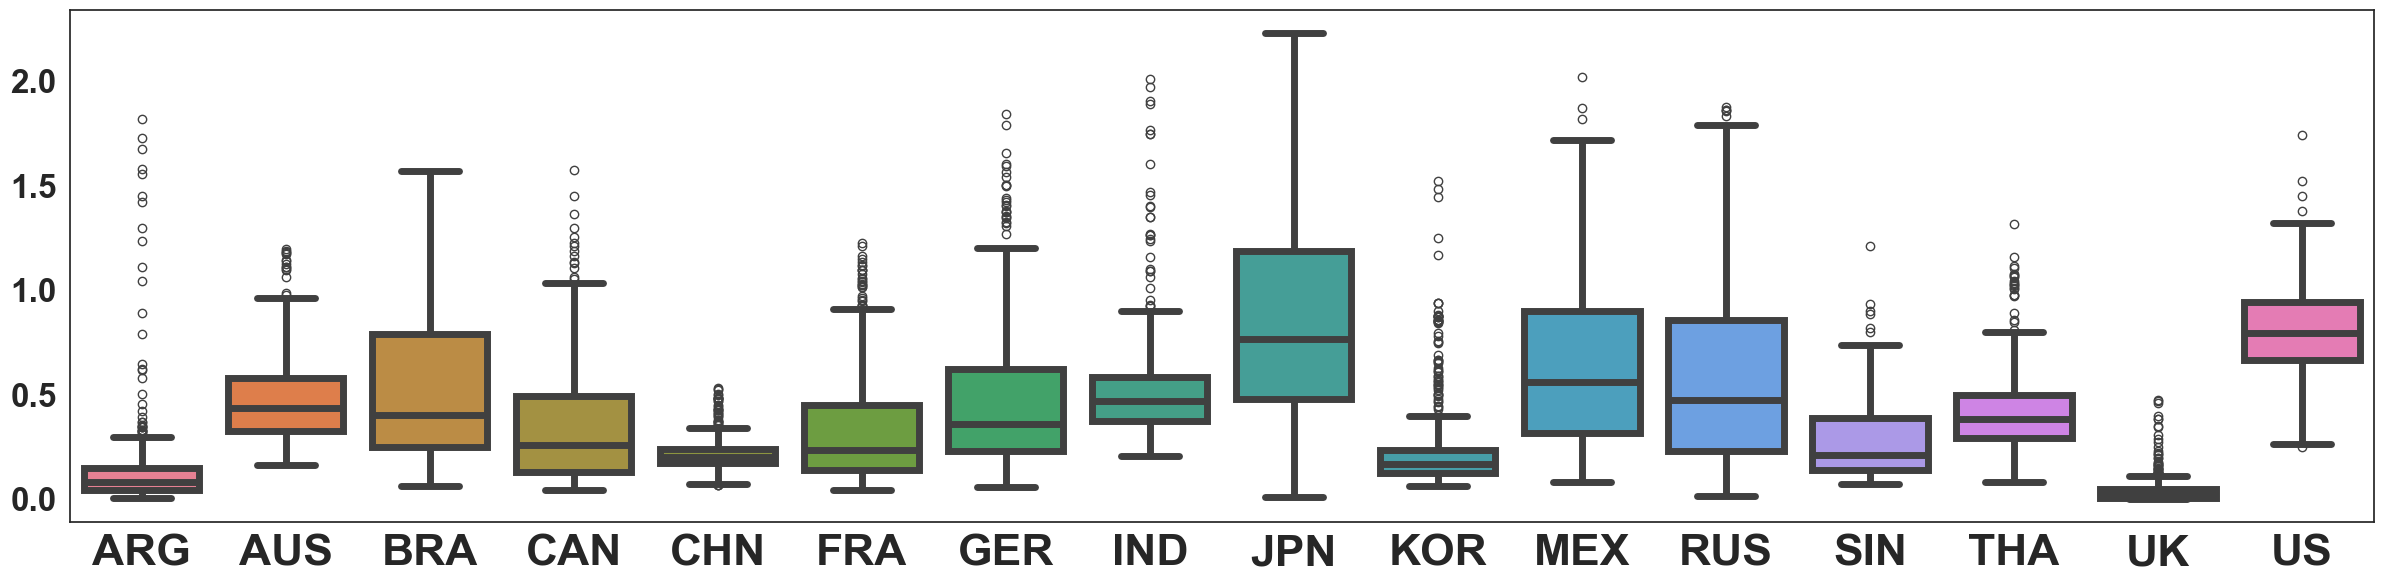

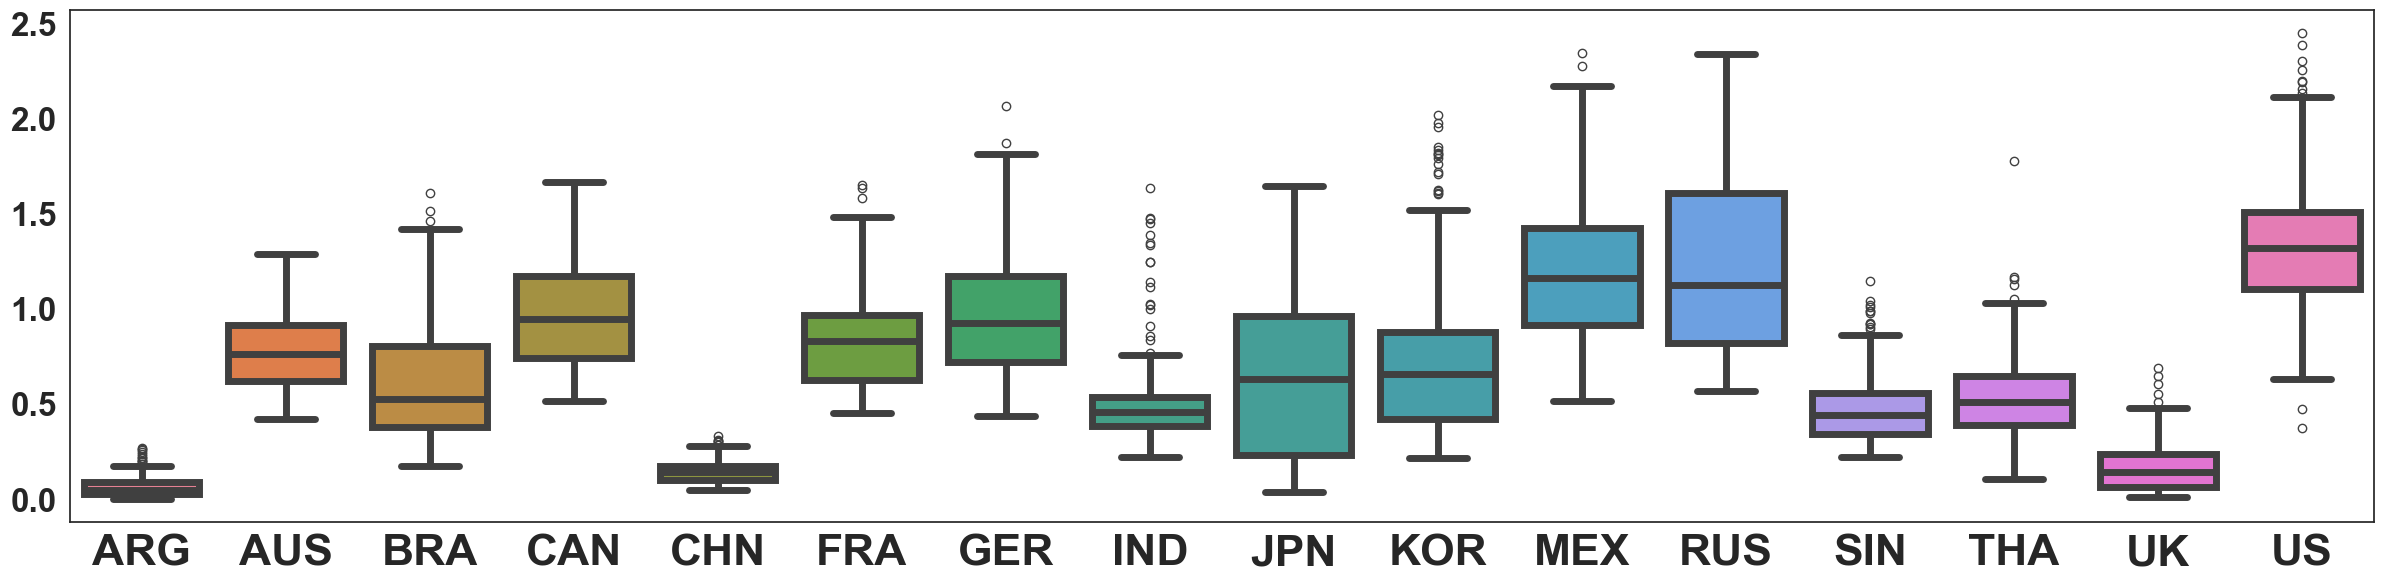

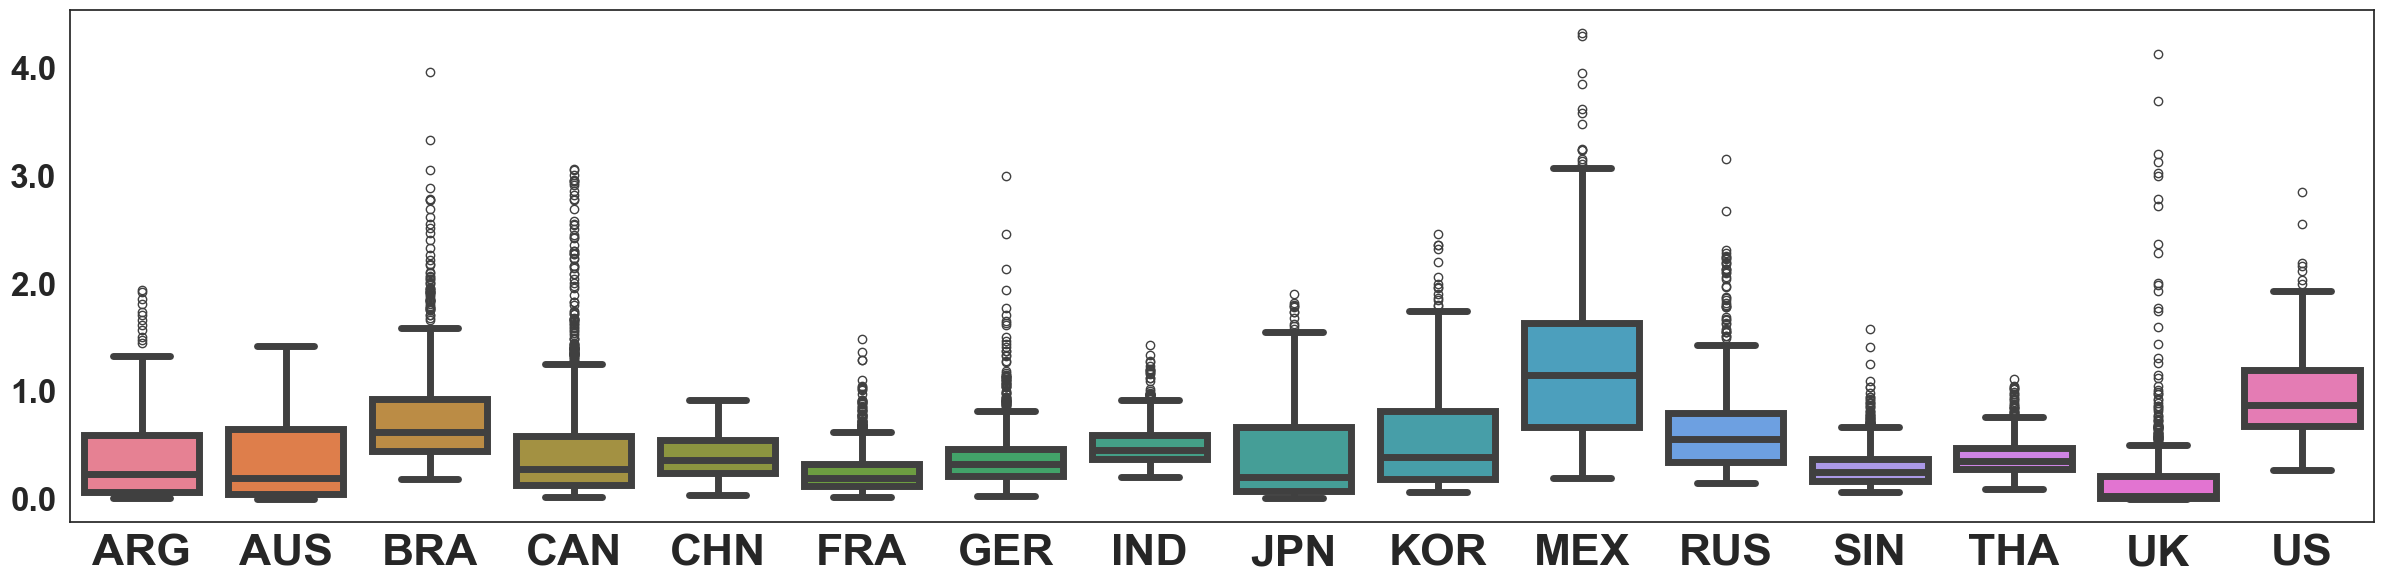

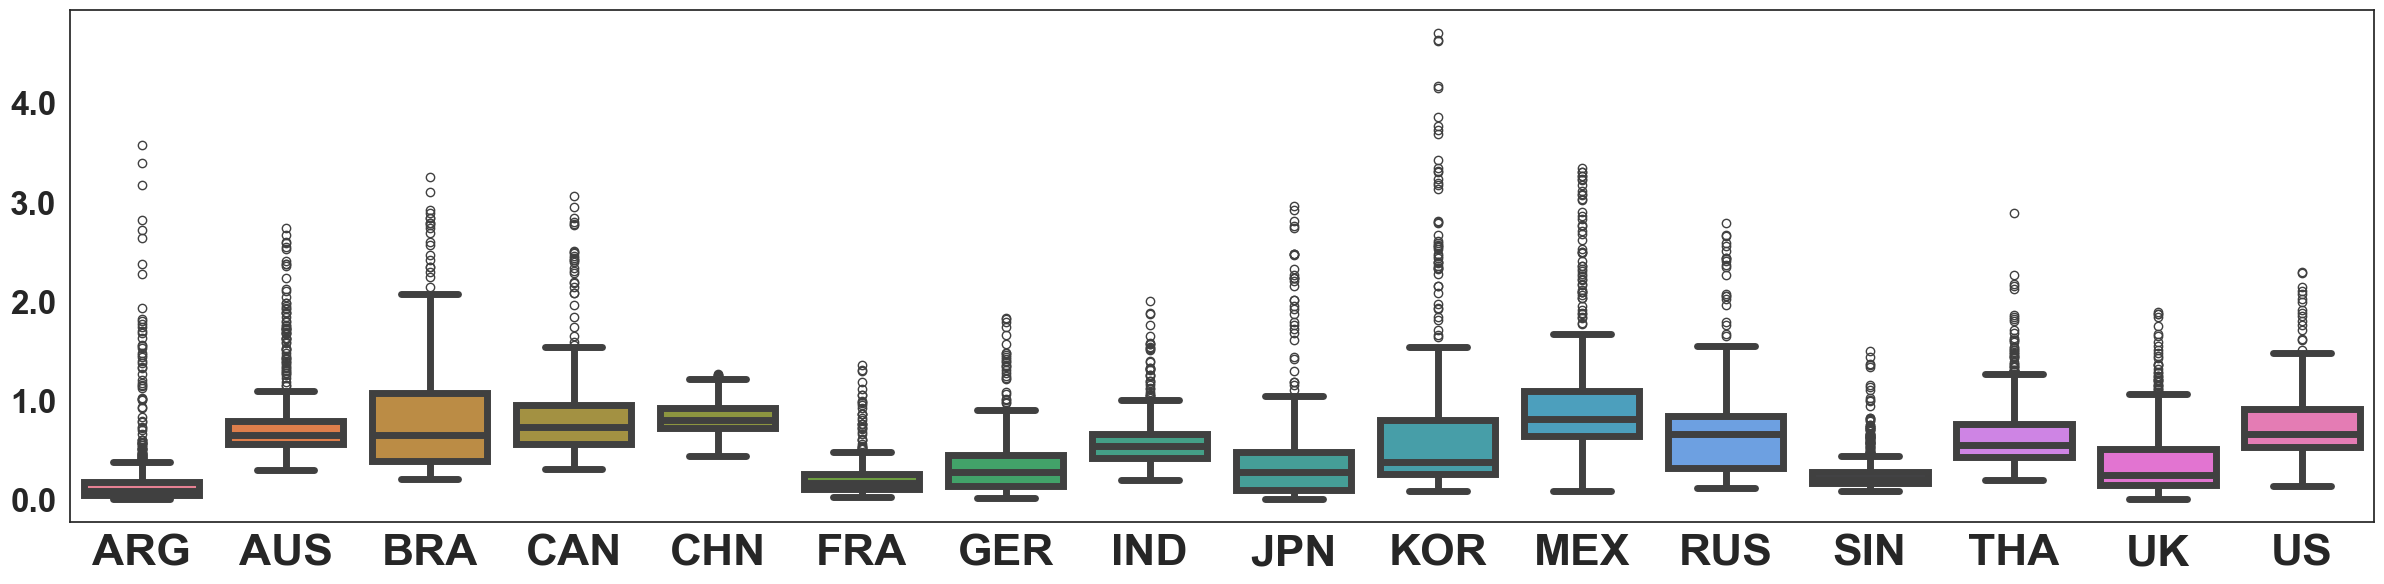

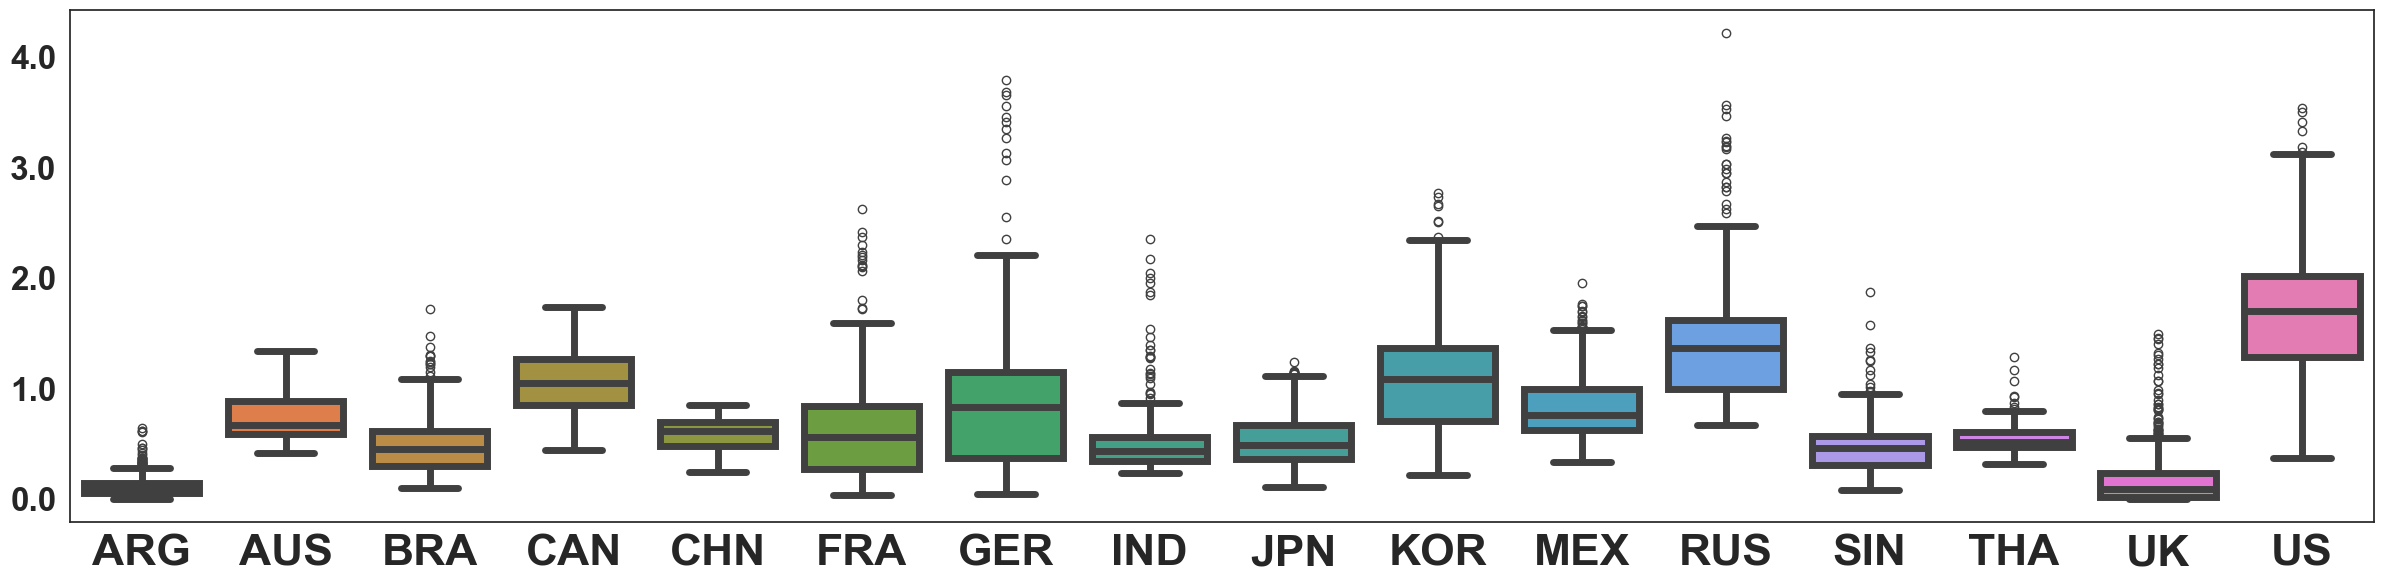

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


critical_dates = pd.to_datetime(['2013-01-01', '2014-10-30', '2015-12-17', '2019-08-01', '2021-11-04', '2023-06-01'])

for i in range(len(critical_dates) - 1):

    start_date = critical_dates[i]
    end_date = critical_dates[i + 1]
    phase_data = composite_data[(composite_data.index >= start_date) & (composite_data.index < end_date)]

    sns.set(style="white")

    plt.figure(figsize=(24, 6))
    sns.boxplot(data=phase_data, linewidth=5)

    plt.tick_params(axis='x', direction='out', length=5)
    plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
    plt.xticks(fontsize=32, fontweight='bold')
    plt.yticks(fontsize=24, fontweight='bold')

    plt.tight_layout()
    plt.savefig(f'DataAnalysis//CTG Analysis//composite_ctg_index_boxplot//boxplot_{i+1}',dpi=300)
    plt.show()


## 1.2 Summed CTG index for each of financial markets

In [67]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

folder='Data/all_ctg_index_value'
file_name_list = os.listdir(folder)
file_name_list.sort()
start_date = '2013-01-01'
end_date = '2023-06-01'


bond_Market=pd.DataFrame()
gold_Market=pd.DataFrame()
forex_Market=pd.DataFrame()
stock_Market=pd.DataFrame()
# Define market names
markets_data = {'b': bond_Market, 'g': gold_Market, 'f': forex_Market, 's': stock_Market}

# Define the groups of edges based on the start node
groups = [
    ['sg', 'sf', 'sb'],
    ['gs', 'gf', 'gb'],
    ['fs', 'fg', 'fb'],
    ['bs', 'bg', 'bf'],
]

country_dict={
    'Argentina':"ARG",
     'Australia':"AUS",
     'Brazil':"BRA",
     'Canada':"CAN",
     'China':"CHN",
     'France':"FRA",
     'Germany':"GER",
     'India':"IND",
     'Japan':"JPN",
     'Korea':"KOR",
     'Mexico':"MEX",
     'Russia':"RUS",
     'Singapore':"SIN",
     'Thailand':"THA",
     'UK':'UK',
     'US':'US'}

for file in file_name_list:

    country=file.split('.')[0].split('_')[-1]

    # Load and prepare the data
    data_path = folder+'\\'+file
    data = pd.read_csv(data_path, parse_dates=[1])
    data.drop(columns=data.columns[0], inplace=True)

    filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

    summary_data=pd.DataFrame()
    # Calculate the risk transmission index for the each start node
    for group in groups:
        start_node = group[0][0]
        summary_data[start_node] = filtered_data[group].sum(axis=1)

    # gold_Market
    market_index = summary_data['g']
    market_index.index=filtered_data['date']
    market_index.name=country_dict[country]
    gold_Market=gold_Market.join(market_index, how='outer')

    # bond_Market
    market_index = summary_data['b']
    market_index.index=filtered_data['date']
    market_index.name=country_dict[country]
    bond_Market=bond_Market.join(market_index, how='outer')

    # stock_Market
    market_index = summary_data['s']
    market_index.index=filtered_data['date']
    market_index.name=country_dict[country]
    stock_Market=stock_Market.join(market_index, how='outer')

    # forex_Market
    market_index = summary_data['f']
    market_index.index=filtered_data['date']
    market_index.name=country_dict[country]
    forex_Market=forex_Market.join(market_index, how='outer')



gold_Market.to_csv('DataAnalysis/CTG Analysis/summed_ctg_index/gold_Market.csv')
bond_Market.to_csv('DataAnalysis/CTG Analysis/summed_ctg_index/bond_Market.csv')
stock_Market.to_csv('DataAnalysis/CTG Analysis/summed_ctg_index/stock_Market.csv')
forex_Market.to_csv('DataAnalysis/CTG Analysis/summed_ctg_index/forex_Market.csv')

### heatmap

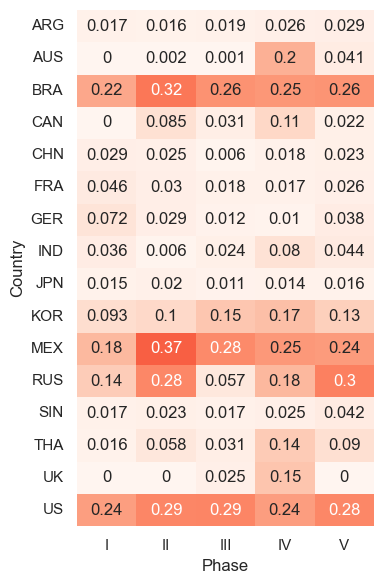

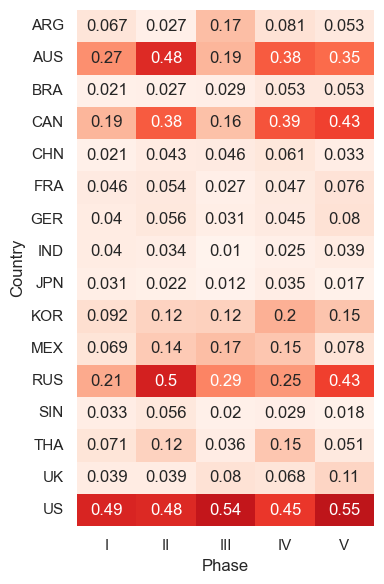

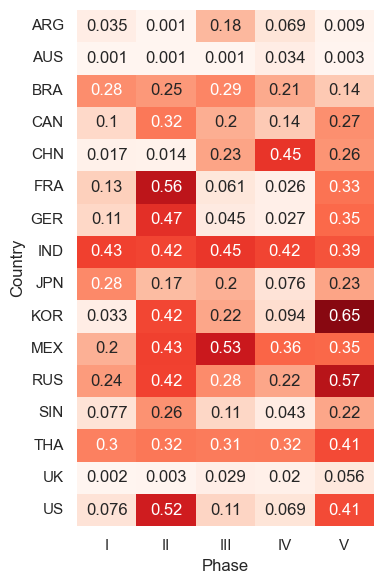

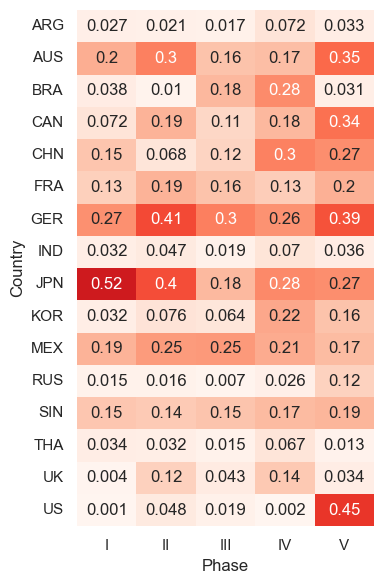

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



for mkt in ['bond','gold','forex','stock']:
    # Load the dataset
    df_market = pd.read_csv('DataAnalysis/CTG Analysis/summed_ctg_index/'+mkt+'_Market.csv')

    # Convert the date column to datetime
    df_market['date'] = pd.to_datetime(df_market['date'])

    # Define the critical dates for the phases
    critical_dates = pd.to_datetime(['2013-01-01', '2014-10-30', '2015-12-17', '2019-08-01', '2021-11-04', '2023-06-01'])

    # Initialize a dictionary to hold the average values for each country and phase
    averages = {country: [] for country in df_market.columns if country != 'date'}

    # Calculate the average values for each phase and country
    for i in range(5):
        start_date = critical_dates[i]
        end_date = critical_dates[i + 1]
        phase_data = df_market[(df_market['date'] >= start_date) & (df_market['date'] < end_date)]

        for country in averages.keys():
            avg_value = phase_data[country].mean()  # Automatically excludes NaN values
            averages[country].append(avg_value)

    # Convert the dictionary to a DataFrame for plotting
    df_averages = pd.DataFrame(averages)

    # Transpose and round the DataFrame for the heatmap
    df_averages_transposed_rounded = df_averages.T.round(3)

    # Define Roman numerals for the phases
    roman_numerals = ["I", "II", "III", "IV", "V"]

    # Plotting the heatmap with the specified adjustments
    plt.figure(figsize=(4, 6))
    sns.heatmap(df_averages_transposed_rounded, annot=True, cmap="Reds",vmin=0, vmax=0.7, cbar=False, xticklabels=roman_numerals, yticklabels=df_averages_transposed_rounded.index)
    plt.xlabel("Phase")
    plt.ylabel("Country")
    plt.yticks(rotation=0)  # Horizontal y-axis labels
    plt.tight_layout()
    plt.savefig('DataAnalysis/CTG Analysis/summed_ctg_index/heatmaps/'+mkt+'_Market_heatmap.png',dpi=300)
    plt.show()


# 2. Inter-market risk transmissions

When visualizing the cross-market risk transmission networks at the domestic level, we have two modes:

- In the first mode, the node size and edge size are scaled within each country to achieve the best display effect. However, this approach does not allow for direct comparisons between different countries. (suit for analysis at country level)
- In the second mode, the edge sizes remain consistent with the first mode, but the node sizes for all countries are obtained according to a unified standard. This mode is suitable for global comparison. (suit for analysis at multilayer level)

In [37]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Mode 1:the node size and edge size are scaled within each country to achieve the best display effect. However, this approach does not allow for direct comparisons between different countries.
# Function to draw a graph with average edge weights and node sizes over a specified time range(Mode 1)
def draw_graph_with_average_weights_and_node_size(df, start_date, end_date, ax):



    # Create a new directed graph
    G = nx.MultiDiGraph()

    # Add nodes
    nodes = list(set([col[0] for col in df.columns[1:]] + [col[1] for col in df.columns[1:]]))
    G.add_nodes_from(nodes)

    # Update node labels
    label_mapping = {'b': 'bond', 'f': 'forex', 's': 'stock', 'g': 'gold'}
    G = nx.relabel_nodes(G, label_mapping)

    # Filter the DataFrame to only include rows within the date range
    df_filtered = df[(df['date'] >= pd.Timestamp(start_date)) & (df['date'] < pd.Timestamp(end_date))]
    #print(pd.Timestamp(df_filtered['date'].min()))
    #print(pd.Timestamp(df_filtered['date'].max()))

    # Calculate average edge weights over the time range
    avg_weights = df_filtered.mean()

    # Initialize a dictionary to store the sum of outgoing weights for each node
    node_impact = {node: 0 for node in nodes}

    # Add edges and attributes, update node sizes
    # Process edges to account for directional differences
    edges_processed = {}
    for col in df.columns[1:]:
        start_node, end_node = col[0], col[1]
        reverse_edge = end_node + start_node
        if reverse_edge in edges_processed:
            continue  # Skip if reverse edge already processed
        start_label = label_mapping[start_node]
        end_label = label_mapping[end_node]
        weight = avg_weights[col]
        node_impact[start_node] += weight
        reverse_weight = avg_weights.get(reverse_edge, 0)
        node_impact[end_node] += reverse_weight
        net_weight = weight - reverse_weight  # Calculate net weight

        # Determine edge direction based on net weight
        if net_weight > 0:
            G.add_edge(start_label, end_label, weight=net_weight)
        elif net_weight < 0:
            G.add_edge(end_label, start_label, weight=-net_weight)

        edges_processed[col] = net_weight  # Mark this edge as processed


    # Calculate node sizes proportional to their impact(Mode 1)
    total_impact = sum(node_impact.values())
    node_sizes = {label_mapping[node]: (impact / total_impact) * 10000 +2000 for node, impact in node_impact.items()}

    # Node colors
    node_colors = {'bond': 'red', 'forex': 'blue', 'stock': 'purple', 'gold': 'orange'}

    # Draw graph
    pos = nx.shell_layout(G, nlist=[['bond', 'forex', 'stock', 'gold']])  # Position nodes in the shape of a square

    # Prepare edge thickness proportional to the edge weight
    edge_weights = [d['weight'] for u, v, d in G.edges(data=True)]
    max_weight = max(df.mean()[1:])
    print(max_weight)
    edge_widths = [1 + abs(weight) * 20 / max_weight for weight in edge_weights]

    nx.draw(G, pos, with_labels=False, node_color=[node_colors[node] for node in G.nodes()],
            node_size=[node_sizes[node] for node in G.nodes()], edge_color='black', width=edge_widths, connectionstyle='arc3,rad=0.2',ax=ax, arrowsize=50)#

    # Draw legend for node colors
    for label, color in node_colors.items():
        ax.scatter([], [], c=color, s=100, label=label)
    #ax.legend(title="Node Types",loc='upper right')

    # Add Title
    #ax.set_title(f"CTG index from {start_date.date()} to {end_date.date()}", fontsize=16)

In [68]:
# Mode 2:the edge sizes remain consistent with the first mode, but the node sizes for all countries are obtained according to a unified standard. This mode is suitable for global comparison.
# Function to draw a graph with average edge weights and node sizes over a specified time range
def draw_graph_with_average_weights_and_node_size_unified(df, start_date, end_date, ax):
    # Create a new directed graph
    G = nx.MultiDiGraph()

    # Add nodes
    nodes = list(set([col[0] for col in df.columns[1:]] + [col[1] for col in df.columns[1:]]))
    G.add_nodes_from(nodes)

    # Update node labels
    label_mapping = {'b': 'bond', 'f': 'forex', 's': 'stock', 'g': 'gold'}
    G = nx.relabel_nodes(G, label_mapping)

    # Filter the DataFrame to only include rows within the date range
    df_filtered = df[(df['date'] >= pd.Timestamp(start_date)) & (df['date'] < pd.Timestamp(end_date))]
    #print(pd.Timestamp(df_filtered['date'].min()))
    #print(pd.Timestamp(df_filtered['date'].max()))

    # Calculate average edge weights over the time range
    avg_weights = df_filtered.mean()

    # Initialize a dictionary to store the sum of outgoing weights for each node
    node_impact = {node: 0 for node in nodes}

    # Add edges and attributes, update node sizes
    # Process edges to account for directional differences
    edges_processed = {}
    for col in df.columns[1:]:
        start_node, end_node = col[0], col[1]
        reverse_edge = end_node + start_node
        if reverse_edge in edges_processed:
            continue  # Skip if reverse edge already processed
        start_label = label_mapping[start_node]
        end_label = label_mapping[end_node]
        weight = avg_weights[col]
        node_impact[start_node] += weight
        reverse_weight = avg_weights.get(reverse_edge, 0)
        node_impact[end_node] += reverse_weight
        net_weight = weight - reverse_weight  # Calculate net weight

        # Determine edge direction based on net weight
        if net_weight > 0:
            G.add_edge(start_label, end_label, weight=net_weight)
        elif net_weight < 0:
            G.add_edge(end_label, start_label, weight=-net_weight)

        edges_processed[col] = net_weight  # Mark this edge as processed

    # Calculate node sizes proportional to their impact(Mode 2)
    total_impact = sum(node_impact.values())
    #node_sizes = {label_mapping[node]: (impact / total_impact) * 10000 +2000 for node, impact in node_impact.items()}
    node_sizes = {label_mapping[node]: 500 + impact*20000  for node, impact in node_impact.items()}

    # Node colors
    node_colors = {'bond': 'red', 'forex': 'blue', 'stock': 'purple', 'gold': 'orange'}

    # Draw graph
    pos = nx.shell_layout(G, nlist=[['bond', 'forex', 'stock', 'gold']])  # Position nodes in the shape of a square

    # Prepare edge thickness proportional to the edge weight
    edge_weights = [d['weight'] for u, v, d in G.edges(data=True)]
    max_weight = max(df.mean()[1:])
    print(max_weight)
    edge_widths = [ 1 + abs(weight) * 20 / max_weight for weight in edge_weights]
    print(node_sizes)
    print(edge_widths)


    nx.draw(G, pos, with_labels=False, node_color=[node_colors[node] for node in G.nodes()],
            node_size=[node_sizes[node] for node in G.nodes()], edge_color='black', width=edge_widths, connectionstyle='arc3,rad=0.2',ax=ax, arrowsize=50)#

    # Draw legend for node colors
    for label, color in node_colors.items():
        ax.scatter([], [], c=color, s=100, label=label)
    #ax.legend(title="Node Types",loc='upper right')

    # Add Title
    #ax.set_title(f"CTG index from {start_date.date()} to {end_date.date()}", fontsize=16)

To determine which mode to use, run the following plotting code

In [8]:
folder='Data/all_ctg_index_value'
file_name_list = os.listdir(folder)
critical_date=pd.to_datetime(['2013-01-01','2014-10-30','2015-12-17','2019-08-01','2021-11-04','2023-06-01'])

for file in ['ctg_allvalue_US.csv','ctg_allvalue_China.csv','ctg_allvalue_Australia.csv']:

    # Load the dataset
    df = pd.read_csv(folder+'\\'+file)

    # Remove the first column as it's redundant
    df.drop(df.columns[0], axis=1, inplace=True)

    # Convert the 'date' column to datetime type
    df['date'] = pd.to_datetime(df['date'])

    # create folders
    country=file.split('.')[0].split('_')[-1]
    print(country)

    path = os.getcwd()+f'\\DataAnalysis\\CTG Analysis\\CTG_Network\\{country}'  # mode 1
    #path = os.getcwd()+f'\\DataAnalysis\\CTG Analysis\\CTG_Network_node_unified\\{country}'  # mode 2

    if not os.path.exists(path):
        os.mkdir(path)

    #image_frames = []

    for i in range(len(critical_date)-1):
        # Create a figure and axis for the plot
        fig, ax = plt.subplots(figsize=(10, 10))
        #ax.set_facecolor('red')
        start = critical_date[i]
        end = critical_date[i+1]

        draw_graph_with_average_weights_and_node_size(df, start, end, ax)  # mode 1
        # draw_graph_with_average_weights_and_node_size_unified(df, start, end, ax)  # mode 2

        # Save the figure to a temporary PNG file
        tmp_image_path = path+f"\ctg_network_in_{country}_phase_{i+1}.png"
        plt.tight_layout()
        plt.savefig(tmp_image_path, transparent=True)
        plt.close(fig)

        # Append the image to the list of image frames
        #image_frames.append(imageio.imread(tmp_image_path))


    # Create the GIF using the list of image frames
    #imageio.mimsave(gif_path+f'\ctg_network_in_{countryname}_phase.gif', image_frames, duration=1)